In [1]:
import csv
from edgeDetection import *
import os
import matplotlib
# matplotlib.use('PS')
import matplotlib.pyplot as plt
import numpy as np
from readTabTxtFile import *
from calTempResolution import *
from trimmedTriggerTime import *
import seaborn as sn
import scipy
from caiman.source_extraction.cnmf.cnmf import load_CNMF
import csv
import pickle
import glob
from sklearn.decomposition import PCA, KernelPCA, FastICA,SparsePCA
from sklearn.cluster import AgglomerativeClustering
from ipywidgets import interact, FloatSlider
from sklearn.cluster import KMeans


2024-07-25 22:11:10.427028: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
directory = "/media/watson/UbuntuHDD/feng_Xin/Xin/Miniscope/newcohort_03242024/sound_discrimination/7277702162024/training_with_miniscope_recordings/day6_training_no_timeout/13_04_50"
subFolder = "Plots/poke_zscore__25-07-2024_15-39-35"
pathName = directory + os.sep + subFolder
preTrigWindow = -100
postTrigWindow = 200
analysis_pre = 15
analysis_post = 80

In [3]:
validIdFile = "validIdx.txt"
cellTracesFile = "cellTraces_norm.txt"
frameCorrectionFile = "frame_correction_pos.pickle"

valid_idx = readTabTxtFile(directory + os.sep + validIdFile, 'int')

with open(directory + os.sep + frameCorrectionFile,'rb') as f:
    frame_correction = pickle.load(f)

with open(directory + os.sep + cellTracesFile, "r", newline="\n") as readFile:
    data_reader = readFile.readlines()



/tmp/ipykernel_1037991/3950970277.py:8: RuntimeWarning: divide by zero encountered in log
  ca_trace_log = np.log(ca_trace_corrected)
/tmp/ipykernel_1037991/3950970277.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


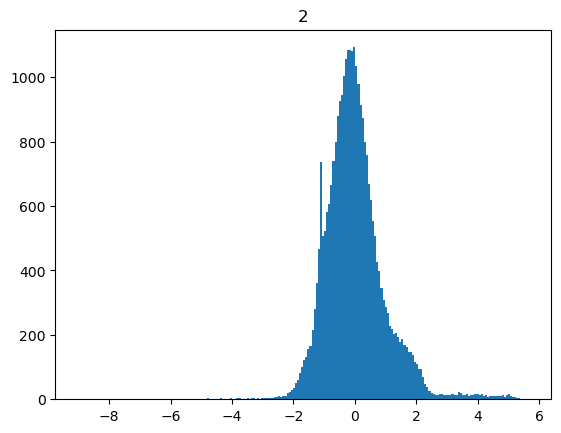

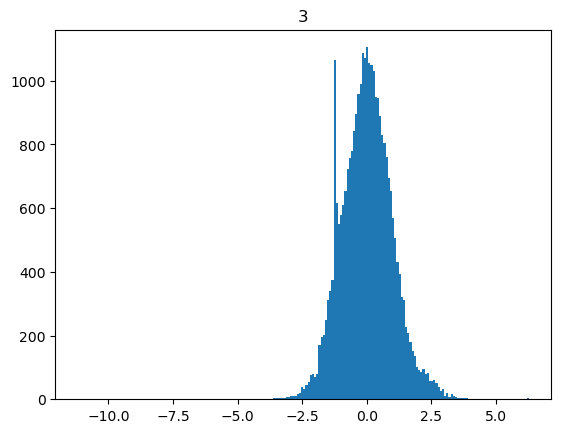

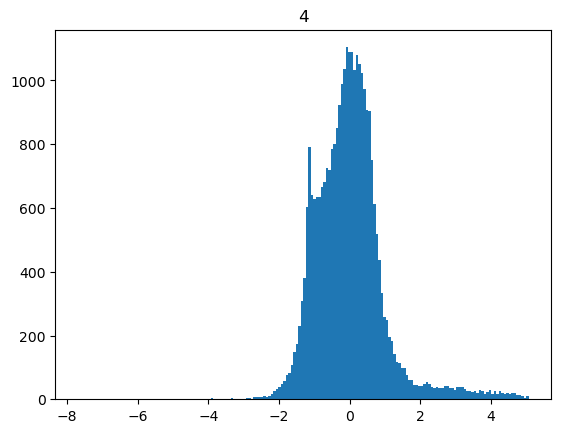

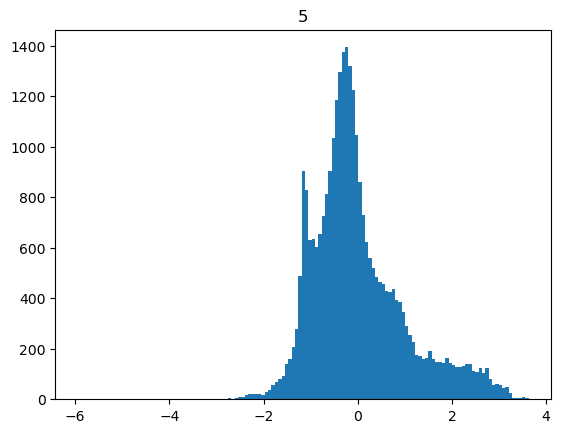

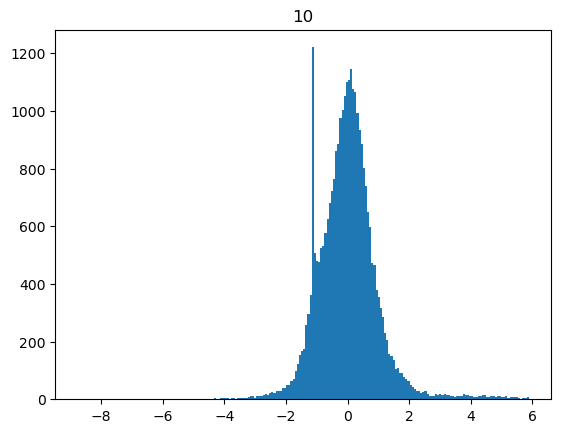

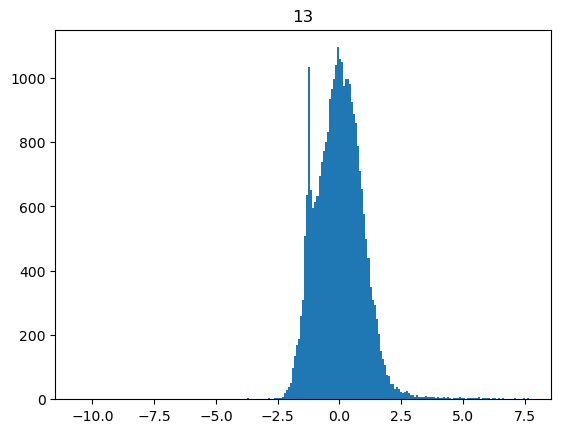

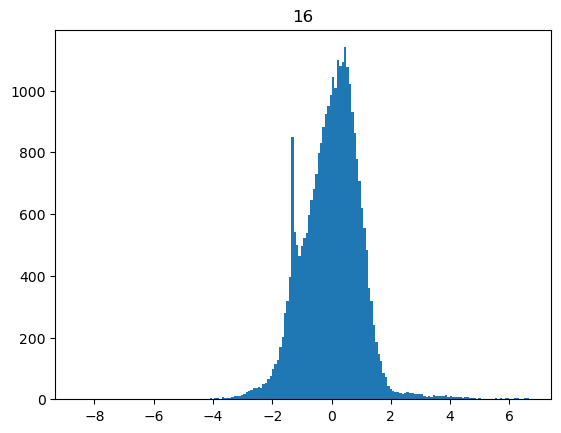

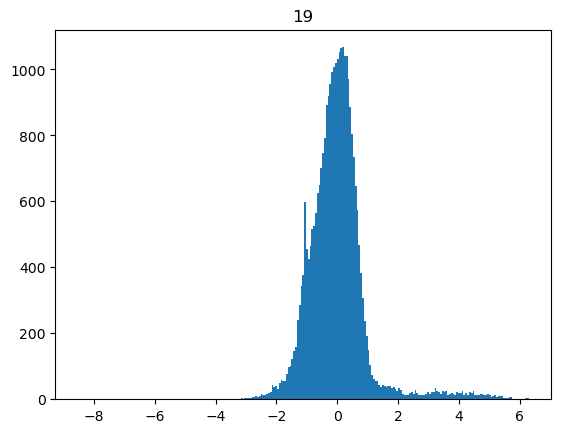

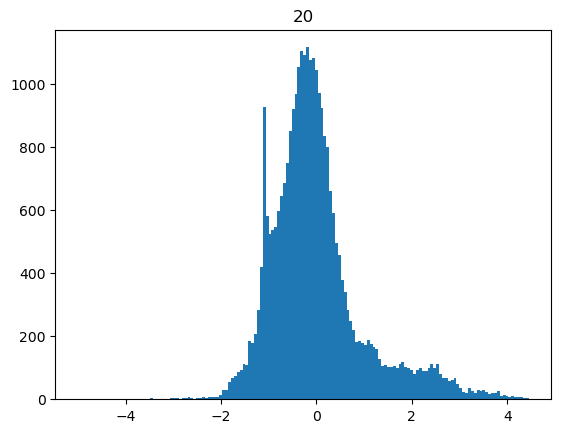

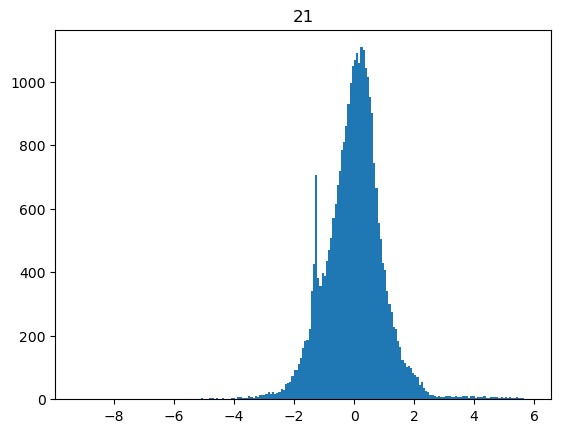

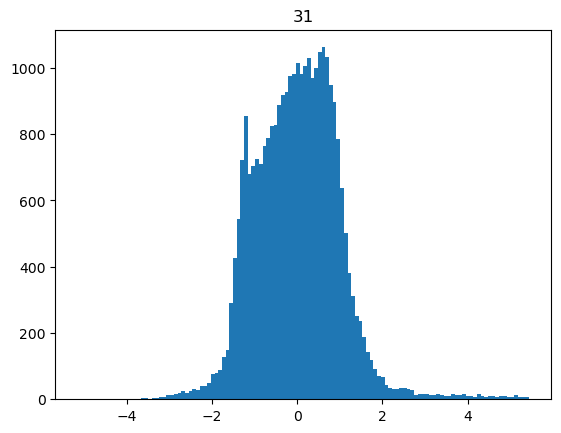

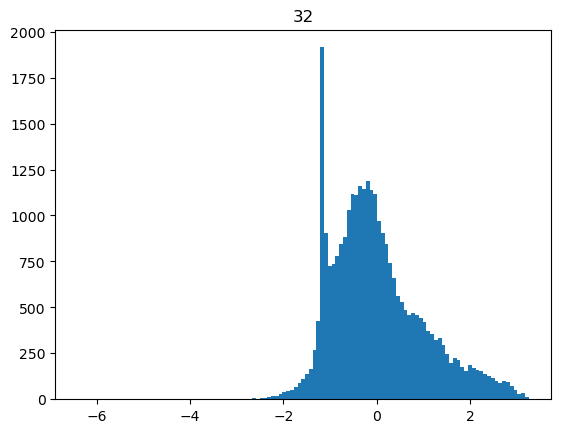

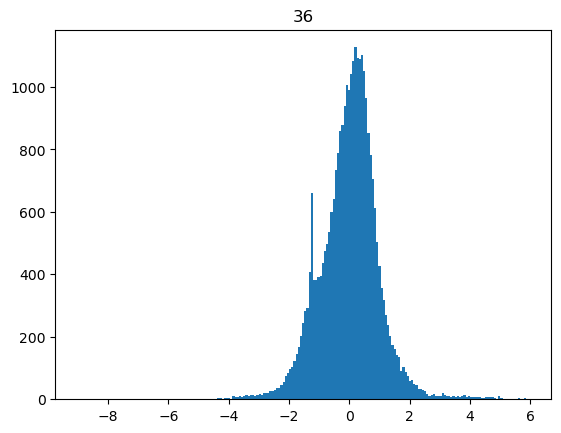

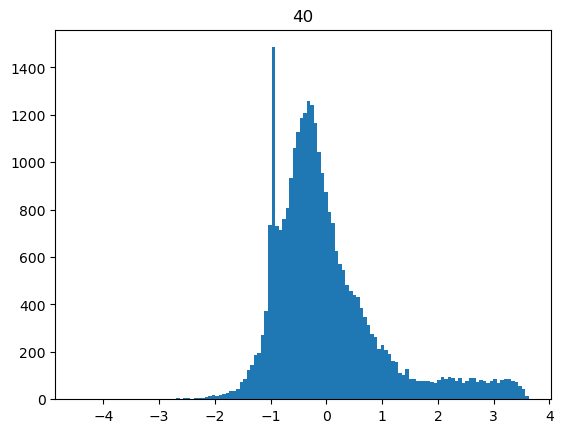

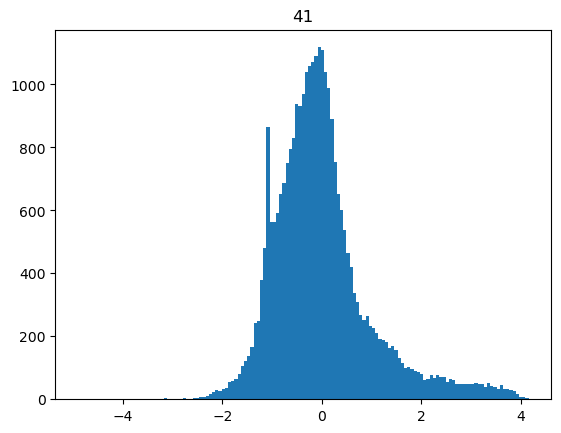

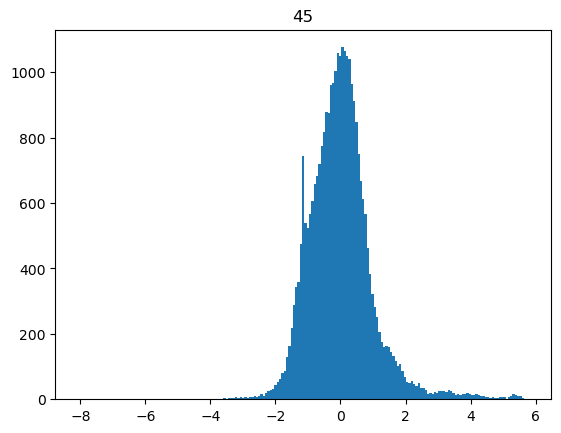

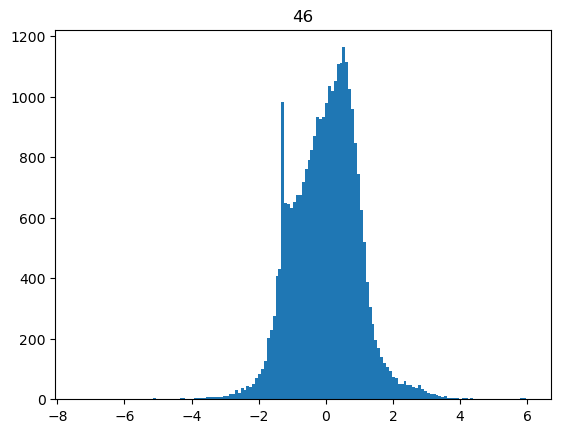

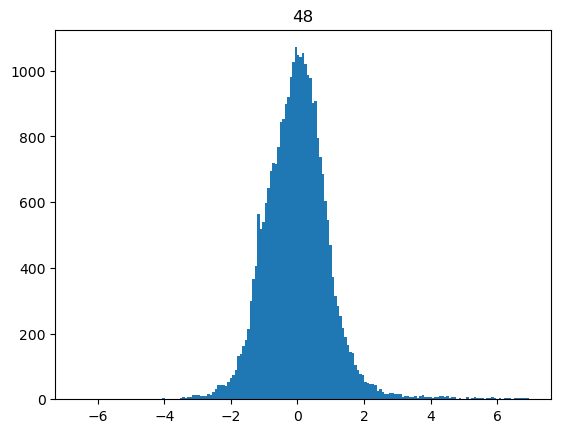

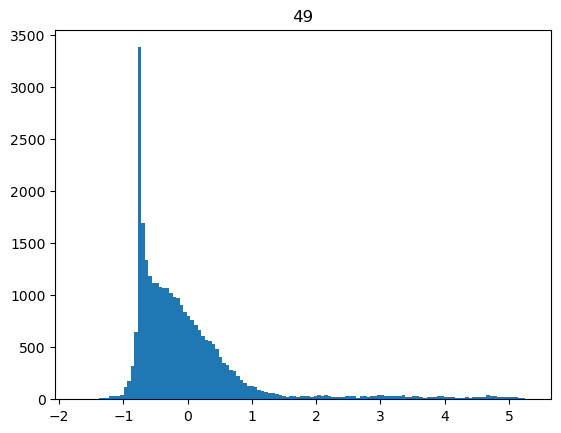

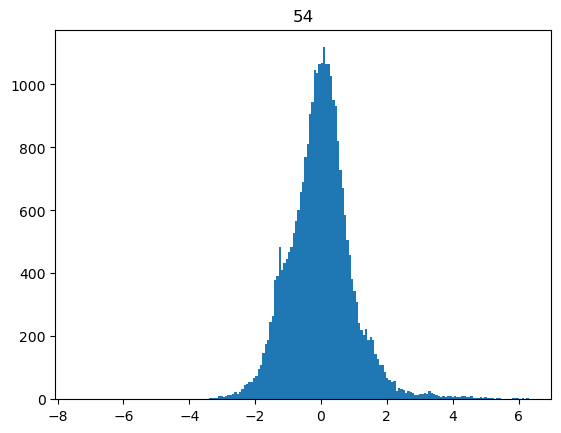

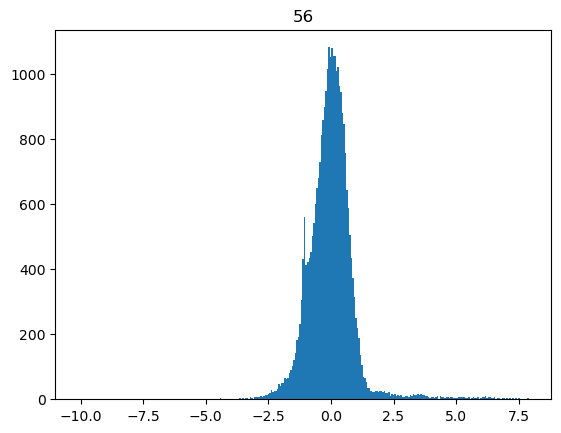

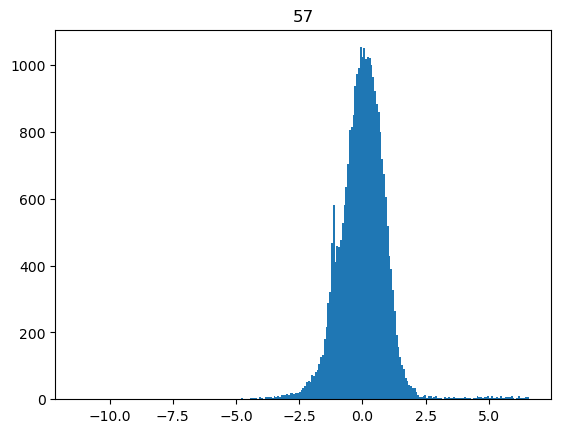

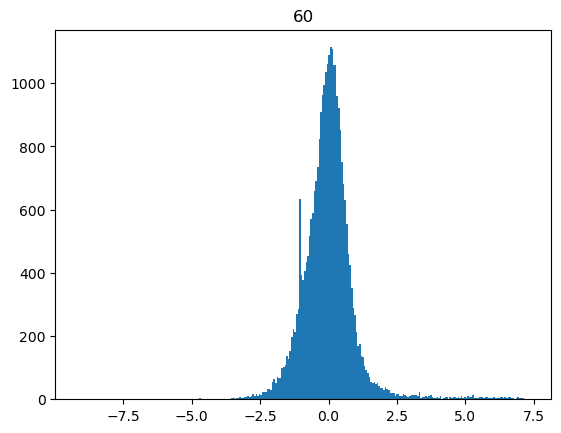

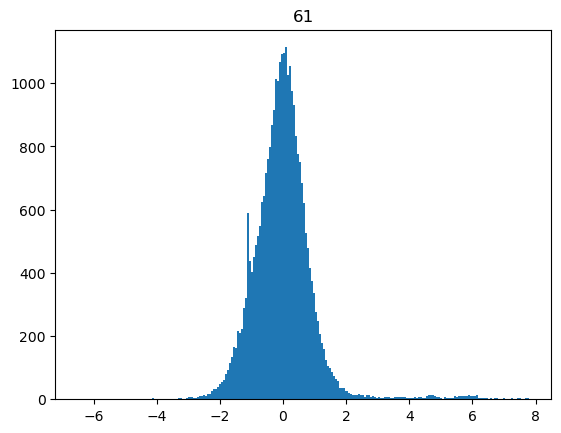

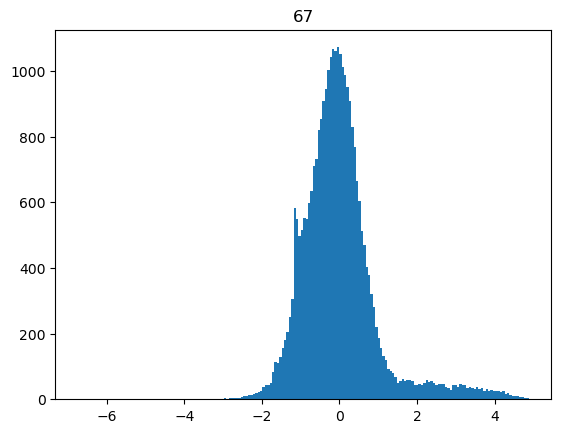

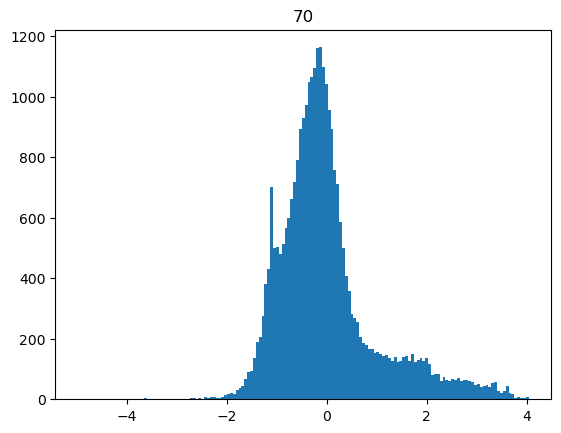

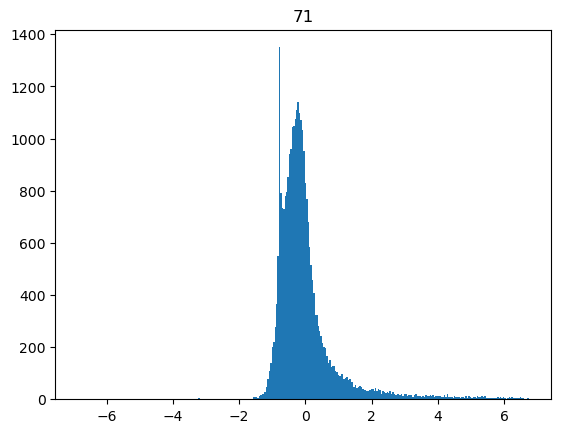

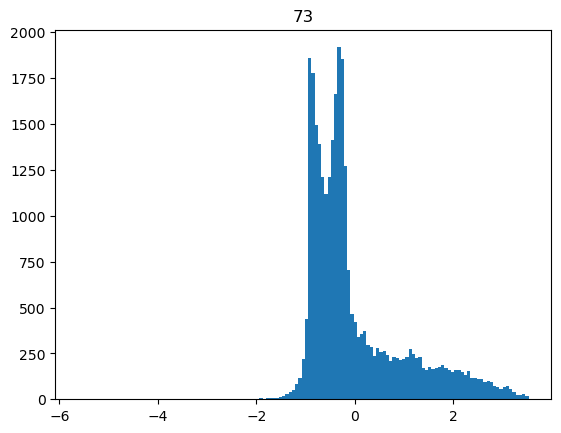

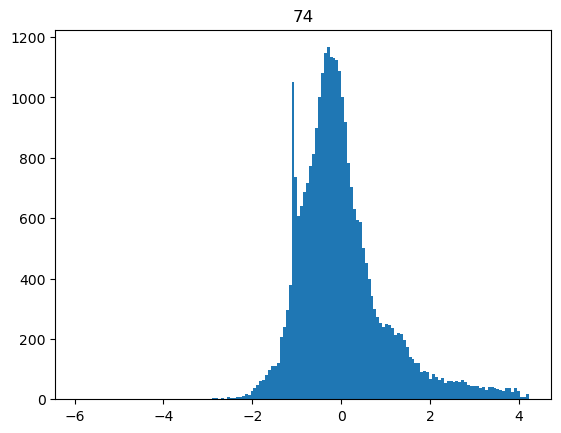

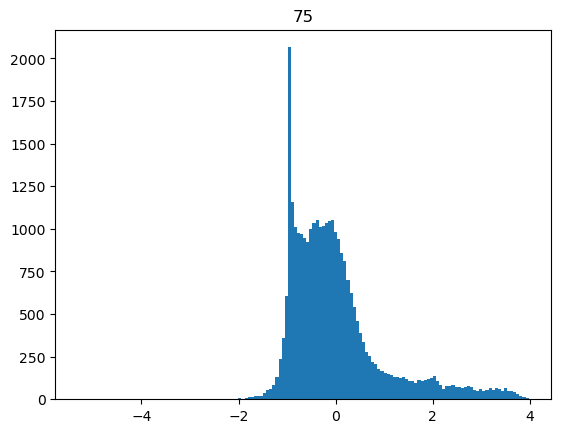

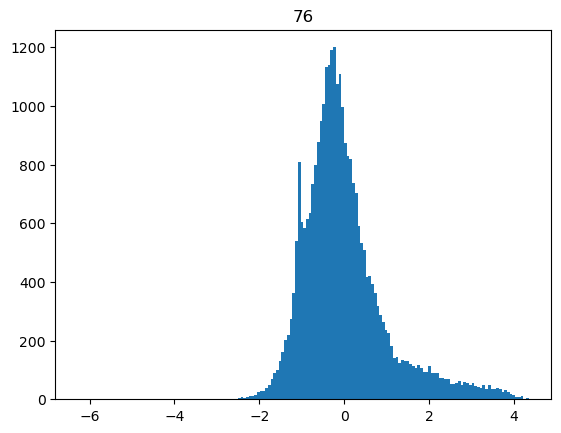

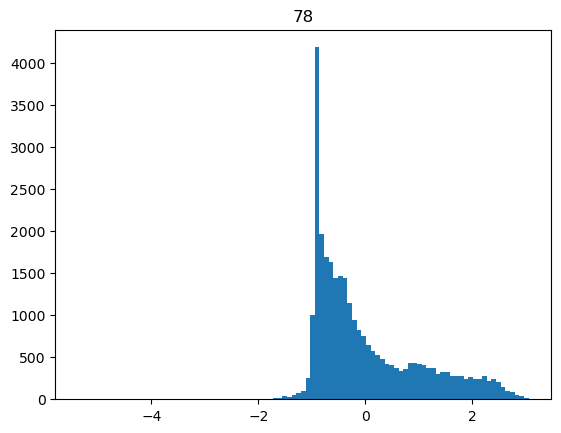

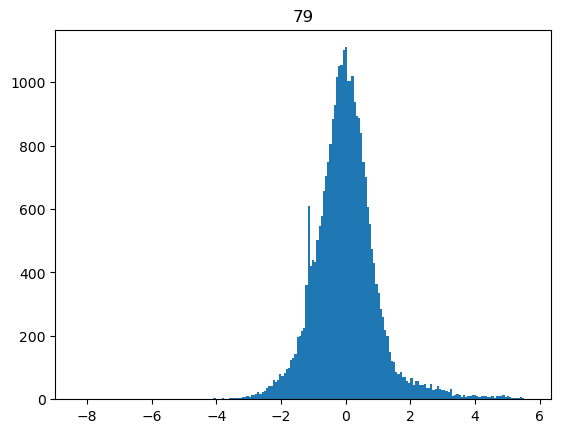

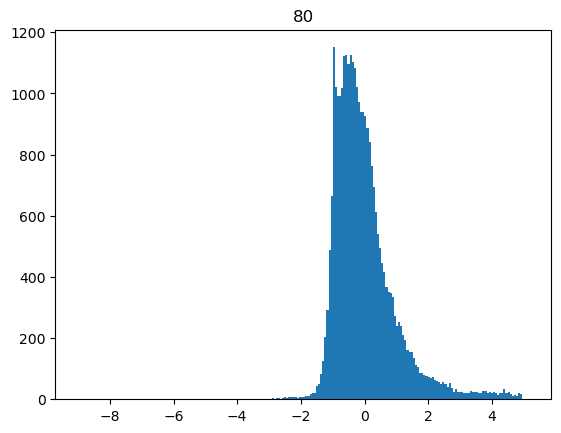

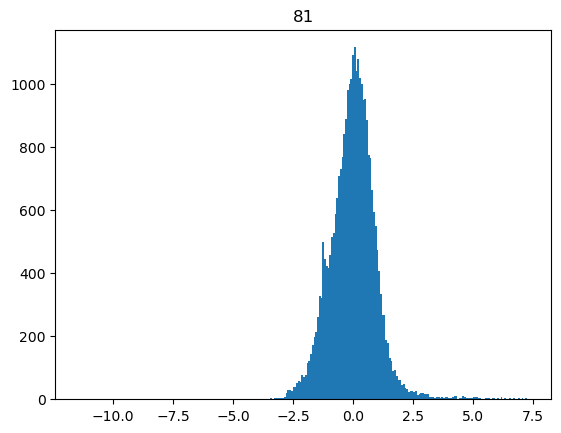

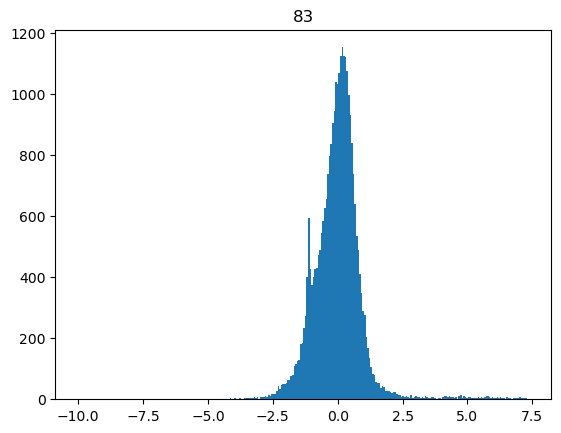

In [21]:
for i in valid_idx:
    ca_trace = [float(k) for k in data_reader[i].strip().split("\t")]
    if frame_correction:
        ca_trace_corrected = ca_trace[0:frame_correction[0]+1]+ [float('NaN')]* frame_correction[1] + ca_trace[frame_correction[0]+1:-1]
    else:
        ca_trace_corrected = ca_trace
    #ca_trace_corrected = scipy.stats.zscore(ca_trace_corrected)
    ca_trace_log = np.log(ca_trace_corrected)    
    ca_trace_log[ca_trace_log==-np.inf]=np.nan

    ca_trace_zscore = scipy.stats.zscore(ca_trace_log,nan_policy='omit')
    percent_90 = np.percentile(ca_trace_zscore,99)
    percent_50 = np.percentile(ca_trace_zscore,50)
    plt.figure()
    plt.hist(ca_trace_zscore, bins='auto')  
    plt.plot(percent_90,200,'ok')
    plt.plot(percent_50,200,'or')
    plt.title(str(i))

In [18]:
percent_50

nan

In [19]:
percent_90

nan

In [ ]:
ca_traces = []
ca_traces_names = []
for file in glob.glob(pathName+os.sep+'*.pickle'):
    #print(os.path.basename(file))
    with open(file,'rb') as f:
        ca_trace_single = pickle.load(f)
    ca_trace_single_mean = np.mean(ca_trace_single,axis=0)
    ca_traces.append(ca_trace_single_mean[-1*preTrigWindow-analysis_pre:-1*preTrigWindow+analysis_post])
    ca_traces_names.append(os.path.basename(file))
ca_traces = np.array(ca_traces)

In [ ]:
pca = PCA(n_components=3)
pca_lick= pca.fit_transform(ca_traces)
X = pca_lick
kmeans = KMeans(n_clusters=3,max_iter=10000).fit(X)
# clustering = AgglomerativeClustering(n_clusters=2,metric='cosine',linkage='average').fit(X)

In [ ]:

# if not os.path.exists(directory+os.sep+'cellTraces_norm.txt'):
#     cnmf_save = load_CNMF(directory + os.sep+'output_rescaled_cnmf_save.hdf5')
#     cellTraces = cnmf_save.estimates.C
#     valid_idx = cnmf_save.estimates.idx_components
#     traces_sz = cellTraces.shape

#     with open(directory + os.sep + "cellTraces.txt", 'w', newline="\n") as f:
#         f_writer = csv.writer(f, delimiter='\t')
#         for i in range(traces_sz[0]):
#             f_writer.writerow(cellTraces[i, :])
#     with open(directory+os.sep+"validIdx.txt", 'w', newline="\n") as f:
#         f_writer = csv.writer(f, delimiter='\t')
#         f_writer.writerow(valid_idx)

# # for 49140 and 49142
# # frameInput = 0
# # lickTrigNum = 1
# # pokeTrigNum = 2
# # caTimeNum = 0
# # pumpTrigNum = 4

# # for 51331, 51332 and 51333
# frameInput = 3
# lickTrigNum = 2
# pokeTrigNum = 0
# caTimeNum = 3
# pumpTrigNum = 1

# validIdFile = "validIdx.txt"
# cellTracesFile = "cellTraces_norm.txt"
# pokeTriggerFile = "stim"+str(pokeTrigNum)+".txt"
# lickTriggerFile = "stim"+str(lickTrigNum)+".txt"
# pumpTriggerFile = "stim"+str(pumpTrigNum)+".txt"

# caTimeFile = "stim"+str(caTimeNum)+".txt"
# plotSavingFolder = 'Plots'
# videoFrameNum = 1000

# with open(directory + os.sep + 'frame_correction_pos.pickle','rb') as f:
#     frame_correction = pickle.load(f)

# def findClosestTimeIndex(t,tSeries):
#     tDiff = [abs(t-i) for i in tSeries]
#     nd_tDiff = np.array(tDiff)
#     pos = np.argmin(nd_tDiff)
#     return pos
# def findClosestLickIndex(t1Series,refT,tSeries):
#     tDiff = [[i-refT,i] for i in t1Series if i-refT>=0]
#     nd_tDiff = np.array(tDiff)
#     lick_pos = np.argmin(nd_tDiff[:,0])
#     pos = findClosestTimeIndex(nd_tDiff[lick_pos,1],tSeries)
#     return pos

# def findAfterClosestIndex(t1Series,refT,tSeries):
#     tDiff = [[i-refT,i] for i in t1Series if i-refT>=0]
#     nd_tDiff = np.array(tDiff)
#     lick_pos = np.argmin(nd_tDiff[:,0])
#     pos = findClosestTimeIndex(nd_tDiff[lick_pos,1],tSeries)
#     return pos

# def findBeforeClosestIndex(t1Series,refT,tSeries):
#     tDiff = [[i-refT,i] for i in t1Series if i-refT<=0]
#     nd_tDiff = np.array(tDiff)
#     lick_pos = np.argmax(nd_tDiff[:,0])
#     pos = findClosestTimeIndex(nd_tDiff[lick_pos,1],tSeries)
#     return pos

# def findAllLickIndices(t1Series,refT,tSeries,window):
#     pos=[]
#     tDiff = [[i - tSeries[refT], i] for i in t1Series if i-tSeries[refT]>0 and i-tSeries[refT]-window*caFrameDur<0]
#     nd_tDiff = np.array(tDiff)
#     for i in nd_tDiff:
#         pos_temp = findClosestTimeIndex(i[1],tSeries)
#         pos.append(pos_temp)
#     return pos

# def interpolateNaN(x):
#     loc = np.argwhere(np.isnan(x))
#     for i in loc:
#         x[i[0]] = (x[i[0]-1] + x[i[0]+1])/2
#     return x
# with open(directory+os.sep+cellTracesFile, "r", newline="\n") as readFile:
#     data_reader = readFile.readlines()
# # with open(directory+os.sep+validIdFile, "r", newline="") as readFile:
# #     id_reader = readFile.readlines()
# # with open(directory+os.sep+triggerFile, "r", newline="") as readFile:
# #     trig_reader = readFile.readlines()
# # with open(directory+os.sep+caTimeFile, "r", newline="") as readFile:
# #     caTime_reader = readFile.readlines()

# caData = readTabTxtFile(directory+os.sep+cellTracesFile, 'float')
# valid_idx = readTabTxtFile(directory+os.sep+validIdFile, 'int')
# pokeTrigTime = readTabTxtFile(directory+os.sep+pokeTriggerFile, 'float')
# lickTrigTime = readTabTxtFile(directory+os.sep+lickTriggerFile, 'float')
# caTime = readTabTxtFile(directory+os.sep+caTimeFile, 'float')
# caFrameDur = calTempResolution(caTime)
# pumpTrigTime = readTabTxtFile(directory+os.sep+pumpTriggerFile, 'float')

# # valid_idx = [int(i) for i in id_reader[0].strip().split("\t")]
# # caTime = [float(i) for i in caTime_reader[0].strip().split("\t")]
# # trigTime = [float(i) for i in trig_reader[0].strip().split("\t")]
# numVideoShift = 0
# preTrigWindow = -100
# postTrigWindow = 100
# len_window = postTrigWindow-preTrigWindow
# trimmed_pokeTrigTime = trimmedTriggerTime(pokeTrigTime,caTime,videoFrameNum*numVideoShift,-1)
# trimmed_lickTrigTime = trimmedTriggerTime(lickTrigTime,caTime,videoFrameNum*numVideoShift,-1)
# trimmed_pumpTrigTime = trimmedTriggerTime(pumpTrigTime,caTime,videoFrameNum*numVideoShift,-1)

# # numTrig = len(trimmed_pokeTrigTime)
# numTrig = len(trimmed_pumpTrigTime)

# numData = len(caData)
# numAnalysisWindow = -1*preTrigWindow+postTrigWindow
# pokeTimeAdj = 0.03

# mean_zscore_ca = np.zeros((len(valid_idx),len_window))
# zscore_ca_lick = np.array([])


In [ ]:
# skip_id = []
# for i in range(len(valid_idx)):
#     print(i)
#     ca_trace = [float(k) for k in data_reader[valid_idx[i]].strip().split("\t")]
#     if frame_correction:
#         ca_trace_corrected = ca_trace[0:frame_correction[0]+1]+ [float('NaN')]*frame_correction[1] + ca_trace[frame_correction[0]+1:-1]
#     else:
#         ca_trace_corrected = ca_trace
#     ca_raw_traces = []

#     for trig_id in range(numTrig):
#         try:

#             ca_pos_temp_pump = findClosestTimeIndex(trimmed_pumpTrigTime[trig_id], caTime)
#             ca_pos_temp = findBeforeClosestIndex(trimmed_pokeTrigTime, trimmed_pumpTrigTime[trig_id], caTime)
#             ca_pos_temp_lick = findAfterClosestIndex(trimmed_lickTrigTime, caTime[ca_pos_temp], caTime)

#             ca_pos = ca_pos_temp - videoFrameNum * numVideoShift
#             ca_pos_lick = ca_pos_temp_lick - videoFrameNum * numVideoShift
#             ca_pos_pump = ca_pos_temp_pump - videoFrameNum * numVideoShift


#             plot_ca = interpolateNaN(ca_trace_corrected[ca_pos_lick + preTrigWindow: ca_pos_lick + postTrigWindow])
#             if np.any(np.isnan(scipy.stats.zscore(plot_ca))):
#                 print('there is an NaN','current i is:',i,'current trig id is:',trig_id,sep='')
#                 skip_id.append(trig_id)
#                 print(skip_id)
#                 continue
#             else:
#                 print("passed")

#         except:
#             print("Analysis window is outside ca2+ data size")


In [ ]:
# for i in range(len(valid_idx)):
#     print(i)
#     ca_trace = [float(k) for k in data_reader[valid_idx[i]].strip().split("\t")]
#     if frame_correction:
#         ca_trace_corrected = ca_trace[0:frame_correction[0]+1]+ [float('NaN')]*frame_correction[1] + ca_trace[frame_correction[0]+1:-1]
#     else:
#         ca_trace_corrected = ca_trace
#     ca_raw_traces = []

#     for trig_id in range(numTrig):
#         if trig_id in skip_id:
#             continue
#         else:
#             try:
    
#                 ca_pos_temp_pump = findClosestTimeIndex(trimmed_pumpTrigTime[trig_id], caTime)
#                 ca_pos_temp = findBeforeClosestIndex(trimmed_pokeTrigTime, trimmed_pumpTrigTime[trig_id], caTime)
#                 ca_pos_temp_lick = findAfterClosestIndex(trimmed_lickTrigTime, caTime[ca_pos_temp], caTime)
    
#                 ca_pos = ca_pos_temp - videoFrameNum * numVideoShift
#                 ca_pos_lick = ca_pos_temp_lick - videoFrameNum * numVideoShift
#                 ca_pos_pump = ca_pos_temp_pump - videoFrameNum * numVideoShift
    
    
#                 plot_ca = interpolateNaN(ca_trace_corrected[ca_pos_lick + preTrigWindow: ca_pos_lick + postTrigWindow])
    
#                 if len(plot_ca)==abs(preTrigWindow)+abs(postTrigWindow):
#                     ca_raw_traces.append(plot_ca)
    
#             except:
#                 print("Analysis window is outside ca2+ data size")
#     zscore_ca = scipy.stats.zscore(ca_raw_traces,axis=1,nan_policy='omit')
#     if i == 0:
      
#         zscore_ca_lick = scipy.stats.zscore(ca_raw_traces,axis=1,nan_policy='omit')
#         zscore_ca_lick = np.expand_dims(zscore_ca_lick,axis=0)
    
#     else:
#         zscore_ca_lick = np.append(zscore_ca_lick,np.expand_dims(scipy.stats.zscore(ca_raw_traces,axis=1,nan_policy='omit'),axis=0),axis=0)

#     mean_zscore_ca[i,:] = np.mean(zscore_ca,axis=0)

In [ ]:

# size = zscore_ca_lick.shape


In [ ]:

# pca_lick = np.zeros((size[0],size[1]*3))

In [ ]:
# for i in range(size[0]):
#     pca_lick[i,:] = np.reshape(pca.fit_transform(zscore_ca_lick[i,:,:]),size[1]*3)

In [ ]:
# import umap
# from sklearn.manifold import TSNE


In [ ]:

# pca_k = KernelPCA(n_components=3,kernel="cosine")
# pca_s = SparsePCA(n_components=3,alpha=1)


In [ ]:

# Define the plotting function
def plot_data(ind_):
    ind = int(ind_)
    plt.figure(figsize=(15,15))
    ax = plt.subplot(121, projection="3d")
    ax.scatter(X[:, 0], X[:, 1],X[:,2],c = kmeans.labels_,cmap=plt.cm.viridis, edgecolor="k",s=np.ones(X[:,0].shape)*100)
    ax.scatter(X[ind, 0], X[ind, 1],X[ind,2],edgecolor="r",s=np.ones(1)*120)
    ax.view_init(elev=30,azim=45,roll=0)

    # ax = plt.subplot(121)
    # ax.scatter(X[:, 0], X[:, 1], c = np.ones(len(valid_idx)),cmap=plt.cm.Greys, edgecolor="k")
    # ax.scatter(X[ind, 0], X[ind, 1], edgecolor="r")
    # print(valid_idx[ind])
    
    plt.subplot(1,2,2)
    plt.plot(ca_traces[ind,:])
    plt.plot(np.ones(10)*analysis_pre,np.linspace(np.min(ca_traces[ind,:]),np.max(ca_traces[ind,:]),10),color='k')
    print(ca_traces_names[ind])
    plt.grid(True)
    
    plt.savefig(pathName+os.sep+'cluster_1.eps',format='eps')

# Create an interactive slider
interact(plot_data, ind_=FloatSlider(min=0, max=ca_traces.shape[0], step=1, value=1))

In [ ]:
new_X = X[clustering.labels_==1,:]
new_zscore_ca = mean_zscore_ca[clustering.labels_==1,:]

In [ ]:
new_clustering = AgglomerativeClustering(n_clusters=3,metric='cosine',linkage='complete').fit(new_X)

In [ ]:
# Define the plotting function
def plot_data_new(ind_):
    ind = int(ind_)
    plt.figure(figsize=(15,15))
    ax = plt.subplot(121, projection="3d")
    ax.scatter(new_X[:, 0], new_X[:, 1],new_X[:,2],c = new_clustering.labels_,cmap=plt.cm.viridis, edgecolor="k",s=np.ones(new_X[:,0].shape)*100)
    ax.view_init(elev=30,azim=45,roll=0)
    ax.scatter(new_X[ind, 0], new_X[ind, 1],new_X[ind,2],edgecolor="r",s=np.ones(1)*100)
    # ax = plt.subplot(331)
    # ax.scatter(X[:, 0], X[:, 1], c = np.ones(len(valid_idx)),cmap=plt.cm.Greys, edgecolor="k")
    # ax.scatter(X[ind, 0], X[ind, 1], edgecolor="r")
    # plt.savefig(directory+os.sep+plotSavingFolder+os.sep+'example_2.eps',format='eps')
    print(ind)
    
    plt.subplot(1,2,2)
    plt.plot(new_zscore_ca[ind,:])
    plt.grid(True)


# Create an interactive slider
interact(plot_data_new, ind_=FloatSlider(min=0, max=ca_traces.shape[0], step=1, value=1))

In [ ]:
# from sklearn.cluster import DBSCAN
# clustering = DBSCAN(eps=4, min_samples=2).fit(X)

In [ ]:
# umap_embedding = umap.UMAP(n_components=2).fit_transform(observed)
# tsne_embedding= TSNE().fit_transform(observed)
